In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math

In [3]:
def stochastic_sim(step,b,sim_number):
    growth_sim=np.zeros([math.floor(50/step),sim_number])
    growth_average=np.zeros(math.floor(50/step))
    growth_sim[0]=np.ones(100)
    growth_average[0]=1
    for i in np.arange(math.floor(50/step)-1):
        for j in np.arange(sim_number):
            r=random.uniform(0,1)
            if r<b*step*growth_sim[i][j]:
                growth_sim[i+1][j]=growth_sim[i][j]+1
            else:
                growth_sim[i+1][j]=growth_sim[i][j]
        growth_average[i+1]=np.mean(growth_sim[i+1])
    sns.scatterplot(y=growth_average,x=np.arange(math.floor(50/step))*step,label=str(step))
    

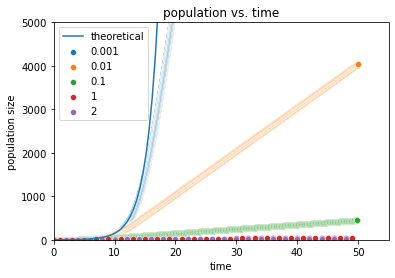

In [4]:
stochastic_sim(0.001,0.5,100)
stochastic_sim(0.01,0.5,100)
stochastic_sim(0.1,0.5,100)
stochastic_sim(1,0.5,100)
stochastic_sim(2,0.5,100)
sns.lineplot(x=np.linspace(0,50,100),y=np.exp(0.5*np.linspace(0,50,100)),label='theoretical')
plt.xlim(0,55)
plt.ylim(0,5e3)
plt.xlabel('time')
plt.ylabel('population size')
plt.title('population vs. time')
plt.savefig('stochastic_q_3_b')

In [32]:
def stochastic_sim_2(step,b,sim_number):
    growth_sim=np.zeros([math.floor(50/step),sim_number])
    growth_2=np.zeros(math.floor(50/step))
    growth_sim[0]=np.ones(100)
    growth_2[0]=0
    for i in np.arange(math.floor(50/step)-1):
        for j in np.arange(sim_number):
            r=random.uniform(0,1)
            if r<b*step*growth_sim[i][j]:
                growth_sim[i+1][j]=growth_sim[i][j]+1
            else:
                growth_sim[i+1][j]=growth_sim[i][j]
        growth_2[i+1]=(growth_sim[i+1]==2).sum()/sim_number
    sns.scatterplot(y=growth_2,x=np.arange(math.floor(50/step))*step,label=str(step))

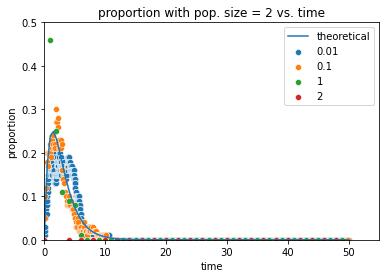

In [5]:
stochastic_sim_2(0.01,0.5,100)
stochastic_sim_2(0.1,0.5,100)
stochastic_sim_2(1,0.5,100)
stochastic_sim_2(2,0.5,100)
sns.lineplot(x=np.linspace(0,50,100),y=np.exp(-0.5*np.linspace(0,50,100))*(1-np.exp(-0.5*np.linspace(0,50,100))),label='theoretical')
plt.xlim(0,55)
plt.ylim(0,0.5)
plt.xlabel('time')
plt.ylabel('proportion')
plt.title('proportion with pop. size = 2 vs. time')
plt.savefig('stochastic_q_3_c')

In [46]:
def stochastic_sim_3(step,b,m,sim_number):
    growth_sim=np.zeros([math.floor(50/step),sim_number])
    growth_average=np.zeros(math.floor(50/step))
    growth_sim[0]=np.ones(100)
    growth_average[0]=1
    for i in np.arange(math.floor(50/step)-1):
        for j in np.arange(sim_number):
            r_1=random.uniform(0,1)
            r_2=random.uniform(0,1)
            if r_1<b*step*growth_sim[i][j]:
                growth_sim[i+1][j]=growth_sim[i][j]+1
            else:
                growth_sim[i+1][j]=growth_sim[i][j]
            if r_2<m*step*growth_sim[i][j]:
                growth_sim[i+1][j]=growth_sim[i][j]-1
            else:
                growth_sim[i+1][j]=growth_sim[i][j]
        growth_average[i+1]=np.mean(growth_sim[i+1])
    sns.scatterplot(y=growth_average,x=np.arange(math.floor(50/step))*step,label=str(step))
    

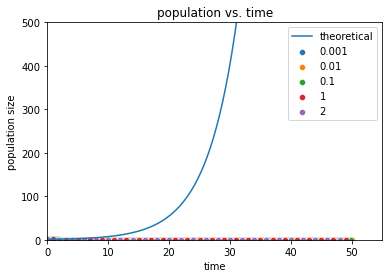

In [7]:
stochastic_sim_3(0.001,0.5,0.3,100)
stochastic_sim_3(0.01,0.5,0.3,100)
stochastic_sim_3(0.1,0.5,0.3,100)
stochastic_sim_3(1,0.5,0.3,100)
stochastic_sim_3(2,0.5,0.3,100)
sns.lineplot(x=np.linspace(0,50,100),y=np.exp(0.2*np.linspace(0,50,100)),label='theoretical')
plt.xlim(0,55)
plt.ylim(0,5e2)
plt.xlabel('time')
plt.ylabel('population size')
plt.title('population vs. time')
plt.savefig('stochastic_q_3_d')

In [38]:
def stochastic_sim_4(N,step,m,sim_number,time):
    growth_sim=np.zeros([math.floor(time/step),sim_number])
    growth_2=np.zeros(math.floor(time/step))
    growth_sim[0]=np.ones(sim_number)*N
    growth_2[0]=0
    for i in np.arange(math.floor(time/step)-1):
        for j in np.arange(sim_number):
            r=random.uniform(0,1)
            if r<m*step*growth_sim[i][j]:
                growth_sim[i+1][j]=growth_sim[i][j]-1
            else:
                growth_sim[i+1][j]=growth_sim[i][j]
        growth_2[i+1]=(growth_sim[i+1]==N).sum()/sim_number
    sns.scatterplot(y=growth_2,x=np.arange(math.floor(time/step))*step,label=str(step))

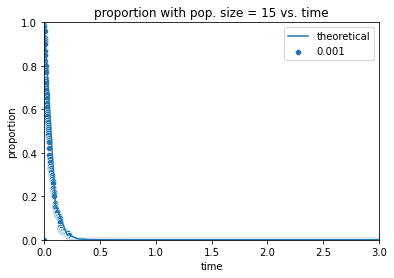

In [44]:
sns.lineplot(x=np.linspace(0,10,100),y=np.exp(-1.2*15*np.linspace(0,10,100)),label='theoretical')
stochastic_sim_4(15,0.001,1.2,100,10)
plt.xlim(0,3)
plt.ylim(0,1)
plt.xlabel('time')
plt.ylabel('proportion')
plt.title('proportion with pop. size = 15 vs. time')
plt.savefig('stochastic_q_4_d')

In [56]:
def stochastic_sim_5(N,step,m,sim_number):
    growth_sim=np.zeros([math.floor(50/step),sim_number])
    growth_average=np.zeros(math.floor(50/step))
    growth_sim[0]=np.ones(100)*N
    growth_average[0]=N
    for i in np.arange(math.floor(50/step)-1):
        for j in np.arange(sim_number):
            r=random.uniform(0,1)
            if r<m*step*growth_sim[i][j]:
                growth_sim[i+1][j]=growth_sim[i][j]-1
            else:
                growth_sim[i+1][j]=growth_sim[i][j]
        growth_average[i+1]=np.mean(growth_sim[i+1])
    sns.scatterplot(y=growth_average,x=np.arange(math.floor(50/step))*step,label=str(step))
    

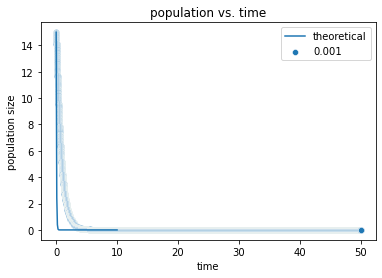

In [58]:
sns.lineplot(x=np.linspace(0,10,100),y=15*np.exp(-1.2*15*np.linspace(0,10,100)),label='theoretical')
stochastic_sim_5(15,0.001,1.2,100)
plt.xlabel('time')
plt.ylabel('population size')
plt.title('population vs. time')
plt.savefig('stochastic_q_4_f')

In [73]:
def stochastic_sim_6(step,f,sim_number):
    growth_sim=np.zeros([math.floor(20/step),sim_number])
    time_dist=np.zeros(sim_number)
    for i in np.arange(math.floor(50/step)-1):
        for j in np.arange(sim_number):
            if growth_sim[i][j]<10:
                r=random.uniform(0,1)
                if f*step<r:
                    growth_sim[i+1][j]=growth_sim[i][j]+1
                else:
                    growth_sim[i+1][j]=growth_sim[i][j]
        return np.sum(growth_sim.transpose()!=0)

In [74]:
stochastic_sim_6(0.001,1,100)

100